# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Frame

In [2]:
df = sns.load_dataset("titanic")

# Gather Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# Statical Information

In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Find Missing Values

In [5]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Percentage of Missing Values

In [7]:
df.isnull().sum() / len(df) *100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

# Missing Values by Graph

<Axes: >

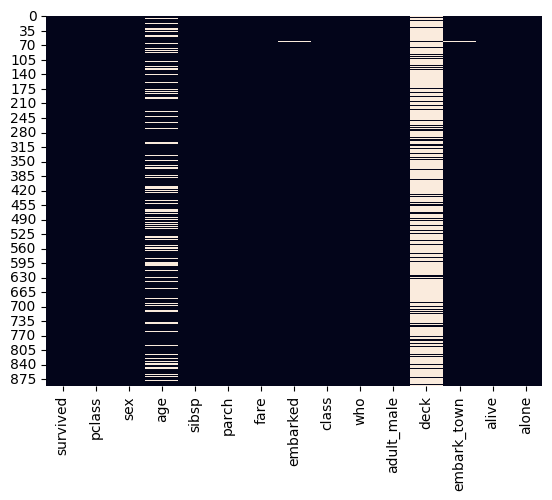

In [8]:
sns.heatmap(df.isnull(), cbar=False)

# Unique Values by Column

In [9]:
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [10]:
df.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [11]:
df.sex.nunique()

2

# Unique Values by Dataframe

In [12]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

# Column Names

In [13]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [14]:
df["embark_town"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [15]:
df["embark_town"].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [16]:
df["who"].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [17]:
corr_df = df[["age","fare","sibsp","parch"]].corr()

<Axes: >

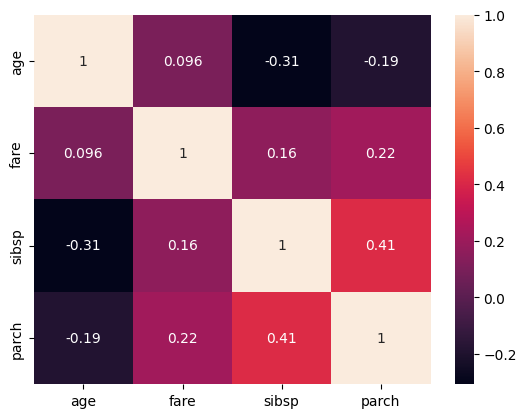

In [22]:
sns.heatmap(corr_df, annot=True)

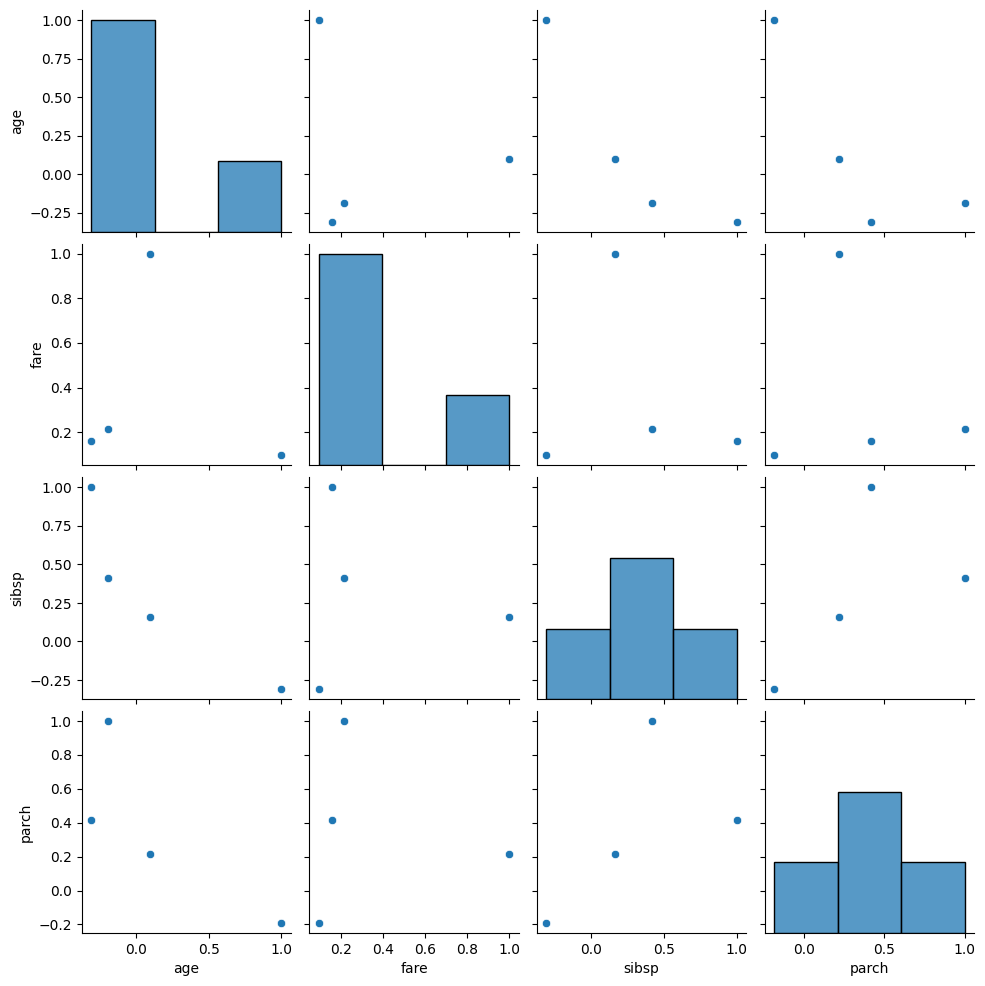

In [23]:
sns.pairplot(corr_df)

# Group by Function

In [24]:
df.groupby("class")["fare"].mean()  

C:\Users\Sohail\AppData\Local\Temp\ipykernel_2152\345993548.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("class")["fare"].mean()


class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [25]:
df.groupby("who")["fare"].mean()

who
child    32.785795
man      24.864182
woman    46.570711
Name: fare, dtype: float64

In [26]:
df.groupby(["survived","sex"])["fare"].mean()

survived  sex   
0         female    23.024385
          male      21.960993
1         female    51.938573
          male      40.821484
Name: fare, dtype: float64

In [27]:
df.groupby(["survived","who"]).size()

survived  who  
0         child     34
          man      449
          woman     66
1         child     49
          man       88
          woman    205
dtype: int64

In [28]:
df.isnull().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

# Imputing Missing Values

In [29]:
#df.drop('deck',axis=1, inplace=True)
df.drop(columns=("deck"),inplace=True)

In [30]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [32]:
df["age"].fillna(df["age"].mean(),inplace=True)
#df["age"].mean()
#df["age"].median()
#df["age"].mode()[0]


In [33]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [34]:
df["embarked"].fillna(df["embarked"].mode()[0],inplace=True)
df["embark_town"].fillna(df["embark_town"].mode()[0],inplace=True)

# Heat Map After Imputing Missing Values

<Axes: >

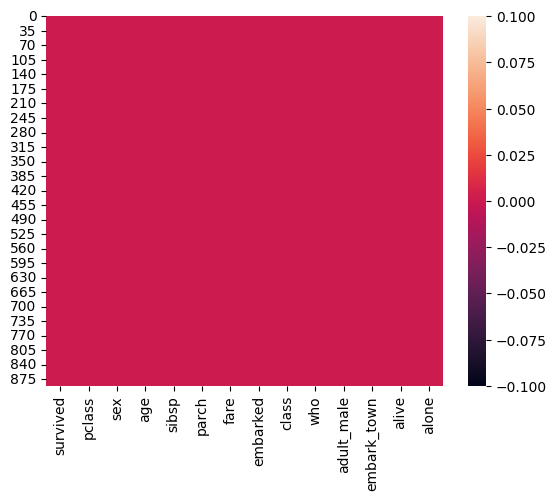

In [36]:
sns.heatmap(df.isnull())

# Create Catagorical Columns from Numeriacal Columns

In [43]:
bins = [0,1,5,12,18,30,50,80]
labels = ["Infants","Toddlers","Kids","Teens","Youngs","Middle Aged","Old"]
df["bined_Age"]=pd.cut(df["age"],bins=bins,labels=labels)

<Axes: xlabel='age', ylabel='Count'>

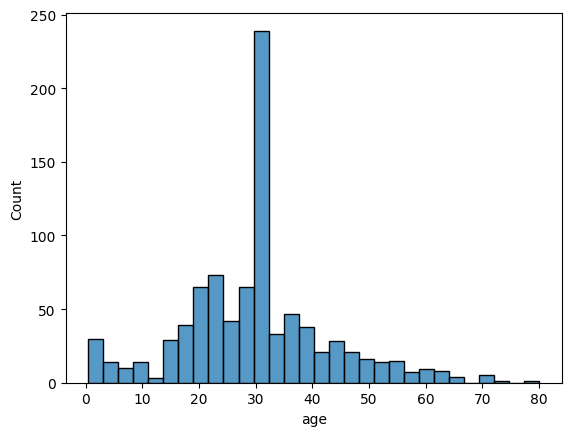

In [44]:
sns.histplot(df["age"])

In [45]:
df.rename(columns={"bined_Age":"age_group"},inplace = True)

In [46]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Youngs
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middle Aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middle Aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middle Aged


In [51]:
df.groupby("survived")["age_group"].value_counts()

survived  age_group  
0         Youngs         299
          Middle Aged    139
          Old             42
          Teens           40
          Kids            16
          Toddlers        11
          Infants          2
1         Youngs         148
          Middle Aged    102
          Teens           30
          Old             22
          Toddlers        19
          Infants         12
          Kids             9
Name: count, dtype: int64

In [40]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [52]:
df_01=df[["survived","age_group","fare","class"]]

In [53]:
df_01.head()

,survived,age_group,fare,class
0,0,Youngs,7.2500,Third
1,1,Middle Aged,71.2833,First
2,1,Youngs,7.9250,Third
3,1,Middle Aged,53.1000,First
4,0,Middle Aged,8.0500,Third


In [54]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   survived   891 non-null    int64   
 1   age_group  891 non-null    category
 2   fare       891 non-null    float64 
 3   class      891 non-null    category
dtypes: category(2), float64(1), int64(1)
memory usage: 16.3 KB


In [37]:
df["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [55]:
df_01[df_01["class"]=="First"].head()

,survived,age_group,fare,class
1,1,Middle Aged,71.2833,First
3,1,Middle Aged,53.1000,First
6,0,Old,51.8625,First
11,1,Old,26.5500,First
23,1,Youngs,35.5000,First


In [39]:
df["fare"].min

<bound method Series.min of 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64>

In [40]:
df["fare"].max

<bound method Series.max of 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64>

In [47]:
df_200=df[df["fare"]>200].head()

In [49]:
df_200['fare'].value_counts()

fare
263.0000    2
247.5208    2
512.3292    1
Name: count, dtype: int64

In [56]:
# how to add two filters
df[(df["fare"]>70) & (df["class"]=="First")]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middle Aged
27,0,1,male,19.000000,3,2,263.0000,S,First,man,True,Southampton,no,False,Youngs
31,1,1,female,29.699118,1,0,146.5208,C,First,woman,False,Cherbourg,yes,False,Youngs
34,0,1,male,28.000000,1,0,82.1708,C,First,man,True,Cherbourg,no,False,Youngs
52,1,1,female,49.000000,1,0,76.7292,C,First,woman,False,Cherbourg,yes,False,Middle Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,1,1,female,62.000000,0,0,80.0000,S,First,woman,False,Southampton,yes,True,Old
835,1,1,female,39.000000,1,1,83.1583,C,First,woman,False,Cherbourg,yes,False,Middle Aged
849,1,1,female,29.699118,1,0,89.1042,C,First,woman,False,Cherbourg,yes,False,Youngs
856,1,1,female,45.000000,1,1,164.8667,S,First,woman,False,Southampton,yes,False,Middle Aged
